# Yusuf Arslan Vize Ödevi
### Ders : Yapay Zeka Uygulamaları
### Yapan Kişi : Yusuf Arslan

### Projenin Amacı : 

Bu proje, yapay zeka uygulamaları kapsamında verilen veri seti kullanılarak makine öğrenmesi modelleri geliştirmeyi amaçlamaktadır. Çalışmada, veri setinin analizi, ön işleme adımları, özellik mühendisliği ve farklı modellerin performanslarının karşılaştırılması gerçekleştirilmiştir.

### Yüklenecek Kütüphaneler

In [1171]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [1172]:
!pip install git+https://github.com/shankarpandala/lazypredict.git

!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24

  Cloning https://github.com/shankarpandala/lazypredict.git to c:\users\yusuf\appdata\local\temp\pip-req-build-0shtka3r
  Resolved https://github.com/shankarpandala/lazypredict.git to commit dddcdceae0ab460c06fcab525127db12d5f934eb
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/shankarpandala/lazypredict.git 'C:\Users\yusuf\AppData\Local\Temp\pip-req-build-0shtka3r'


Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit-learn-0.24.0.tar.gz (7.4 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-learn


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [26 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  Traceback (most recent call last):
    File "C:\Users\yusuf\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\yusuf\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\yusuf\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 251, in build_wheel
      return _build_backend().build_wheel(wheel_directory, config_settings,
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\

In [1173]:
pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor , RandomForestRegressor
import re
from ydata_profiling import ProfileReport
from lazypredict.Supervised import LazyRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter("ignore")

### Veri Okuma Ve Veri Setinin Özellikler

In [1176]:
df = pd.read_csv("laptop_data.csv")

In [1177]:
print("<----------Veri setinin ilk 5 satırını gösterir. Veri yapısını ve örnekleri incelemek için kullanılır.---------->")
print("")
print(df.head())
print("")
print("<---------Veri setindeki sütunların veri tiplerini, eksik veri durumunu ve genel yapıyı özetler.--------->")
print("")
print("")
print(df.info())
print("")
print("<----------Her sütundaki eksik değerlerin toplamını gösterir. Eksik veri analizi için kullanılır.---------->")
print("")
print("")
print(df.isnull().sum())
print("")
print("<----------Sayısal sütunların istatistiksel özetini verir (ortalama, medyan, min, max vb.).---------->")
print("")
print(df.describe())
print("")
print("<----------Her sütundaki benzersiz (unique) değerlerin sayısını gösterir. Kategorik ve sayısal veri analizi için faydalıdır.---------->")
print("")
print(df.nunique()) 
print("")
print("<----------Her sütunun veri tipini (int, float, object vb.) gösterir. Veri türüne göre işlemler yapmak için kullanılır.---------->")
print("")
print(df.dtypes) 
print("")
print("<----------Veri setindeki sütun isimleri ve açıklamalarını bir tablo olarak görselleştirir.---------->")
print("")
field_descriptions = {
    "Unnamed: 0": "Satır ID (otomatik oluşturulmuş)",
    "Company": "Laptop üretici firması",
    "TypeName": "Laptop türü",
    "Inches": "Ekran boyutu (inç cinsinden)",
    "ScreenResolution": "Ekran çözünürlüğü",
    "Cpu": "İşlemci bilgisi",
    "Ram": "RAM kapasitesi",
    "Memory": "Depolama türü ve kapasitesi",
    "Gpu": "Grafik işlemcisi",
    "OpSys": "İşletim sistemi",
    "Weight": "Ağırlık",
    "Price": "Fiyat"
}
field_df = pd.DataFrame(list(field_descriptions.items()), columns=["Sütun İsmi", "Açıklama"])
print(field_df)

<----------Veri setinin ilk 5 satırını gösterir. Veri yapısını ve örnekleri incelemek için kullanılır.---------->

   Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook   13.30                            1440x900   
2           2      HP   Notebook   15.60                   Full HD 1920x1080   
3           3   Apple  Ultrabook   15.40  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook   13.30  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Wei

In [1178]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Veri Görselleştirme

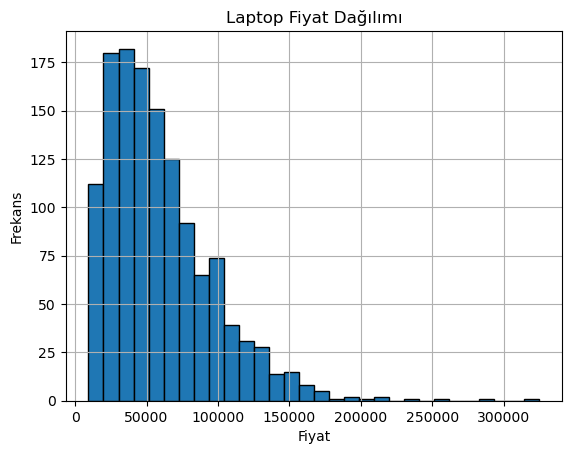


<----------Veri Setinde laptopun Fiyata göre Tablolandırır.---------->
<----------Frekans belirlenir fiyata göre belirlenir----------------->




In [1180]:
df["Price"].hist(bins=30, edgecolor="black")
plt.title("Laptop Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

print("")
print("<----------Veri Setinde laptopun Fiyata göre Tablolandırır.---------->")
print("<----------Frekans belirlenir fiyata göre belirlenir----------------->")
print("")
print("")

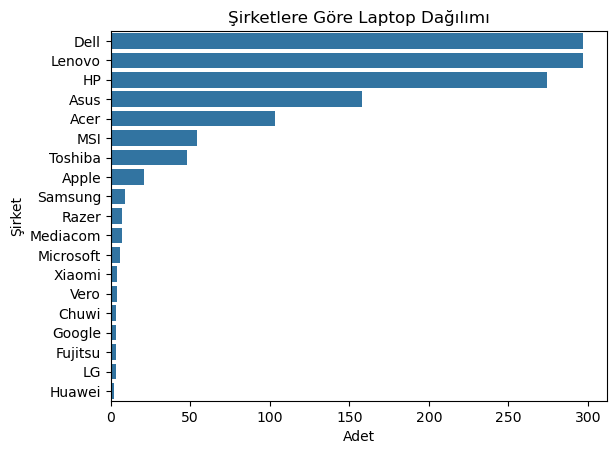


<----------Veri Setinde Şirkete Adet türü Tablolandırır.---------->
<----------Markalar Belirlenir Adete göre Sıralanır--------------->




In [1181]:
sns.countplot(data=df, y="Company", order=df["Company"].value_counts().index)
plt.title("Şirketlere Göre Laptop Dağılımı")
plt.xlabel("Adet")
plt.ylabel("Şirket")
plt.show()

print("")
print("<----------Veri Setinde Şirkete Adet türü Tablolandırır.---------->")
print("<----------Markalar Belirlenir Adete göre Sıralanır--------------->")
print("")
print("")

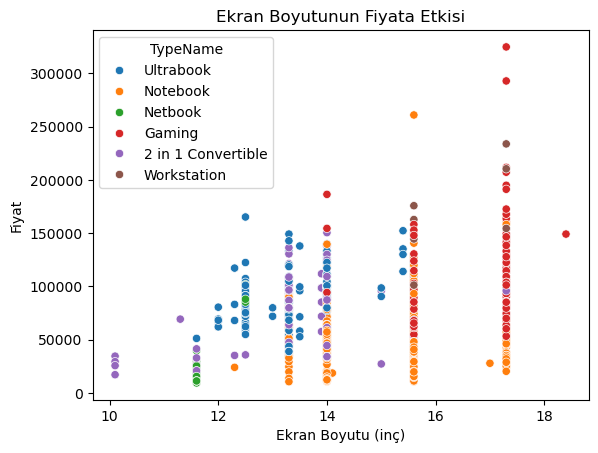


<----------Veri Setinde Ekran Boyutun Fiyata Etkisi Tablolandırır.---------->
<----------Markalar Belirlenir Fiyata göre ekran boyutu sıralanır----------->




In [1182]:
sns.scatterplot(data=df, x="Inches", y="Price", hue="TypeName")
plt.title("Ekran Boyutunun Fiyata Etkisi")
plt.xlabel("Ekran Boyutu (inç)")
plt.ylabel("Fiyat")
plt.show()

print("")
print("<----------Veri Setinde Ekran Boyutun Fiyata Etkisi Tablolandırır.---------->")
print("<----------Markalar Belirlenir Fiyata göre ekran boyutu sıralanır----------->")
print("")
print("")

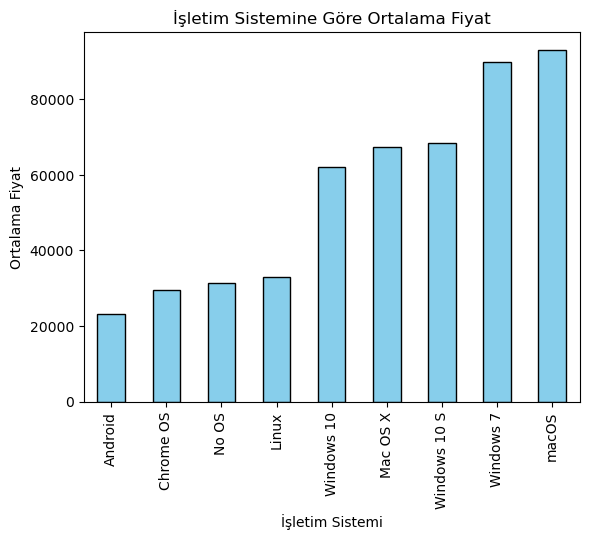


<----------Veri Setinde İşletim Sistemine Göre Ortalama Fiyat Tablolandırır.------->
<----------Ortlama Fiyat Hesaplanır İşletim Sistemlerine göre Sıralanır.----------->




In [1183]:
avg_price_per_os = df.groupby("OpSys")["Price"].mean().sort_values()
avg_price_per_os.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("İşletim Sistemine Göre Ortalama Fiyat")
plt.xlabel("İşletim Sistemi")
plt.ylabel("Ortalama Fiyat")
plt.show()

print("")
print("<----------Veri Setinde İşletim Sistemine Göre Ortalama Fiyat Tablolandırır.------->")
print("<----------Ortlama Fiyat Hesaplanır İşletim Sistemlerine göre Sıralanır.----------->")
print("")
print("")

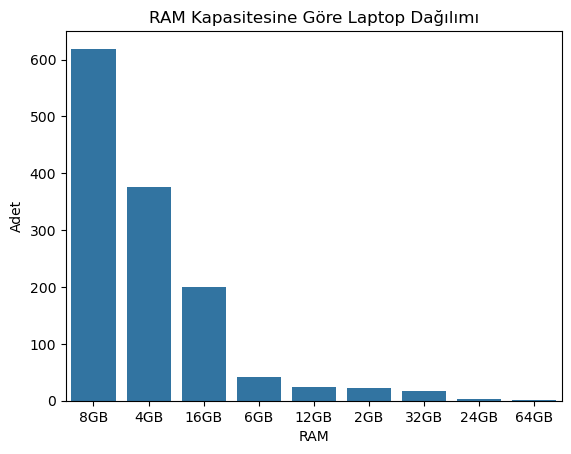


<----------Veri Setinde RAM Kapasitesine Göre Laptop Dağılımı Tablolandırır.------->
<----------Ram boyutuna göre adet hesaplanır ve Sıralanır.------------------------->




In [1184]:
sns.countplot(data=df, x="Ram", order=df["Ram"].value_counts().index)
plt.title("RAM Kapasitesine Göre Laptop Dağılımı")
plt.xlabel("RAM")
plt.ylabel("Adet")
plt.show()

print("")
print("<----------Veri Setinde RAM Kapasitesine Göre Laptop Dağılımı Tablolandırır.------->")
print("<----------Ram boyutuna göre adet hesaplanır ve Sıralanır.------------------------->")
print("")
print("")

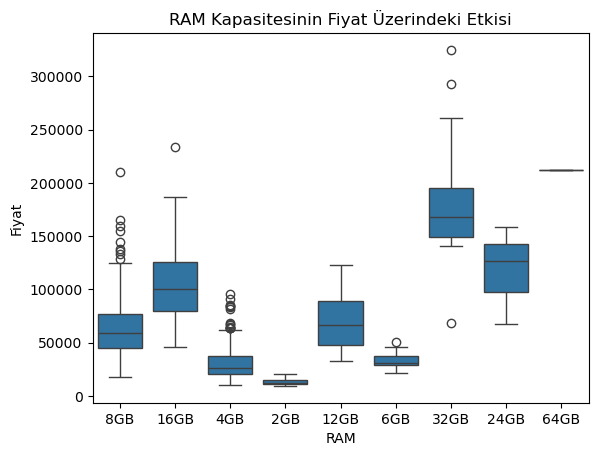


<----------Veri Setinde RAM Kapasitesinin Fiyat Üzerindeki Etkisi Tablolandırır.------->
<-------------Ram boyutuna göre Fiyat hesaplanır ve Sıralanır.------------------------->




In [1185]:
sns.boxplot(data=df, x="Ram", y="Price")
plt.title("RAM Kapasitesinin Fiyat Üzerindeki Etkisi")
plt.xlabel("RAM")
plt.ylabel("Fiyat")
plt.show()

print("")
print("<----------Veri Setinde RAM Kapasitesinin Fiyat Üzerindeki Etkisi Tablolandırır.------->")
print("<-------------Ram boyutuna göre Fiyat hesaplanır ve Sıralanır.------------------------->")
print("")
print("")

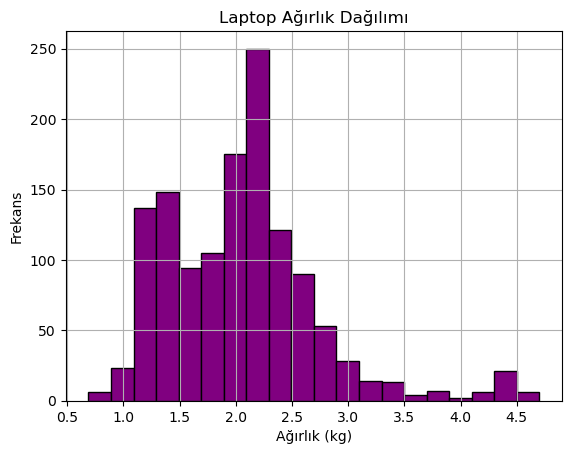


<----------Veri Setinde Laptop Ağırlık Dağılımı Tablolandırır.------->




In [1186]:
df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)  # Ağırlık sütununu temizle
df["Weight"].hist(bins=20, edgecolor="black", color="purple")
plt.title("Laptop Ağırlık Dağılımı")
plt.xlabel("Ağırlık (kg)")
plt.ylabel("Frekans")
plt.show()

print("")
print("<----------Veri Setinde Laptop Ağırlık Dağılımı Tablolandırır.------->")
print("")
print("")

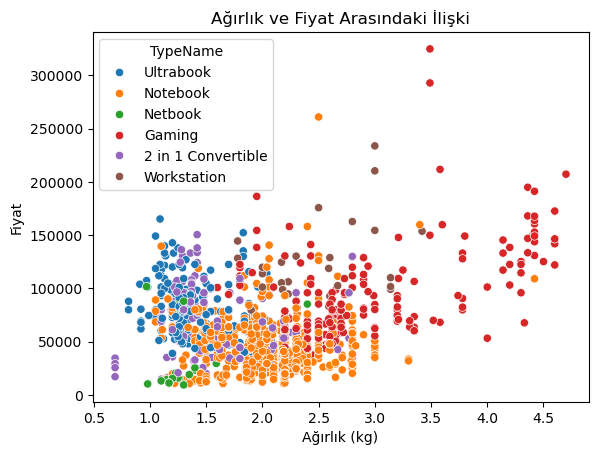


<----------Veri Setinde Ağırlık ve Fiyat Arasındaki İlişki Tablolandırır.------->




In [1187]:
sns.scatterplot(data=df, x="Weight", y="Price", hue="TypeName")
plt.title("Ağırlık ve Fiyat Arasındaki İlişki")
plt.xlabel("Ağırlık (kg)")
plt.ylabel("Fiyat")
plt.show()

print("")
print("<----------Veri Setinde Ağırlık ve Fiyat Arasındaki İlişki Tablolandırır.------->")
print("")
print("")

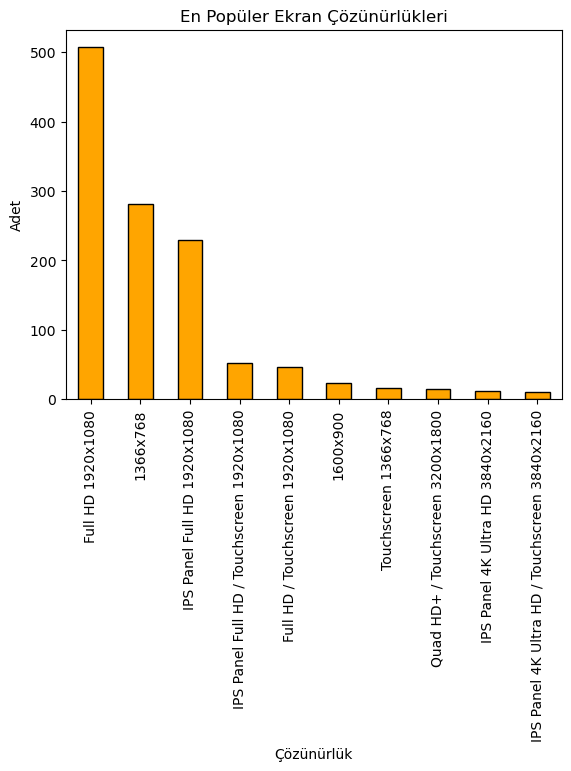


<----------Veri Setinde En Popüler Ekran Çözünürlükleri Tablolandırır.------->




In [1188]:
resolution_counts = df["ScreenResolution"].value_counts().head(10)
resolution_counts.plot(kind="bar", color="orange", edgecolor="black")
plt.title("En Popüler Ekran Çözünürlükleri")
plt.xlabel("Çözünürlük")
plt.ylabel("Adet")
plt.xticks(rotation=90)
plt.show()

print("")
print("<----------Veri Setinde En Popüler Ekran Çözünürlükleri Tablolandırır.------->")
print("")
print("")

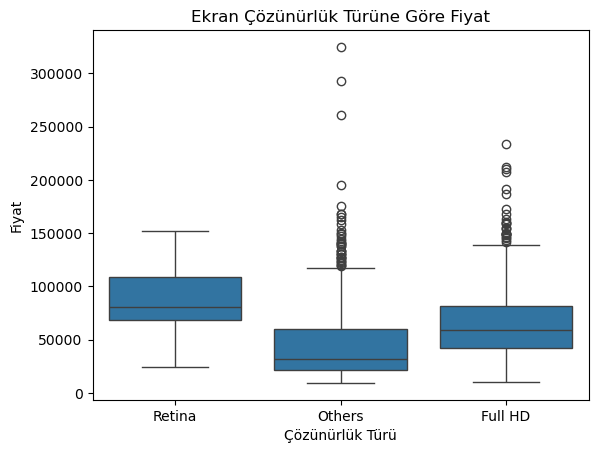


<----------Veri Setinde Ekran Çözünürlük Türüne Göre Fiyat Tablolandırır.------->




In [1189]:
df["Resolution_Type"] = df["ScreenResolution"].apply(lambda x: "Retina" if "Retina" in x else "Full HD" if "1920x1080" in x else "Others")
sns.boxplot(data=df, x="Resolution_Type", y="Price")
plt.title("Ekran Çözünürlük Türüne Göre Fiyat")
plt.xlabel("Çözünürlük Türü")
plt.ylabel("Fiyat")
plt.show()

print("")
print("<----------Veri Setinde Ekran Çözünürlük Türüne Göre Fiyat Tablolandırır.------->")
print("")
print("")

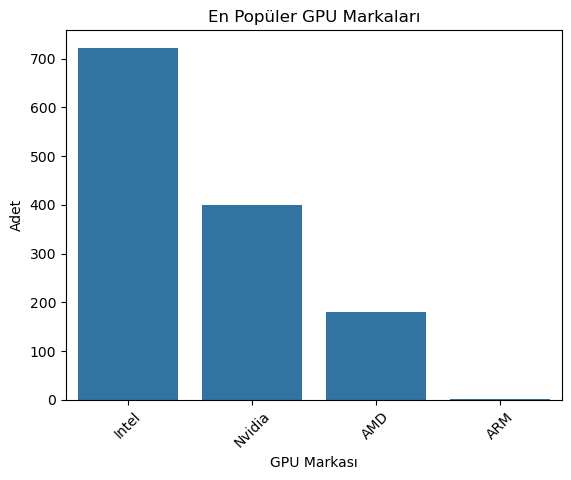


<----------Veri Setinde En Popüler GPU Markaları Tablolandırır.------->




In [1190]:
df["Gpu_Brand"] = df["Gpu"].apply(lambda x: x.split()[0])  # İlk kelime genellikle marka
sns.countplot(data=df, x="Gpu_Brand", order=df["Gpu_Brand"].value_counts().index[:10])
plt.title("En Popüler GPU Markaları")
plt.xlabel("GPU Markası")
plt.ylabel("Adet")
plt.xticks(rotation=45)
plt.show()

print("")
print("<----------Veri Setinde En Popüler GPU Markaları Tablolandırır.------->")
print("")
print("")

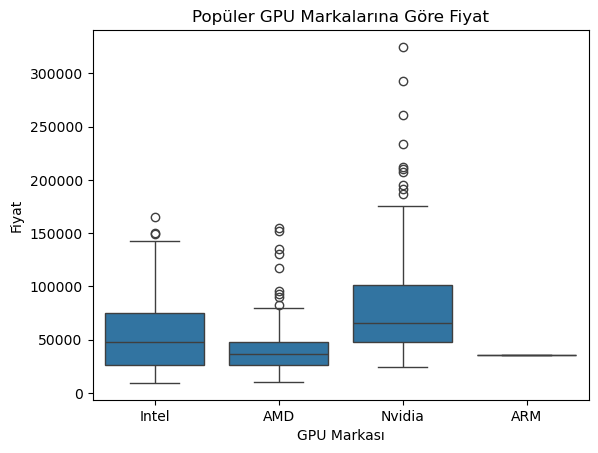


<----------Veri Setinde Popüler GPU Markalarına Göre Fiyat Tablolandırır.------->




In [1191]:
top_gpu_brands = df["Gpu_Brand"].value_counts().index[:5]  # En popüler 5 GPU markası
sns.boxplot(data=df[df["Gpu_Brand"].isin(top_gpu_brands)], x="Gpu_Brand", y="Price")
plt.title("Popüler GPU Markalarına Göre Fiyat")
plt.xlabel("GPU Markası")
plt.ylabel("Fiyat")
plt.show()

print("")
print("<----------Veri Setinde Popüler GPU Markalarına Göre Fiyat Tablolandırır.------->")
print("")
print("")

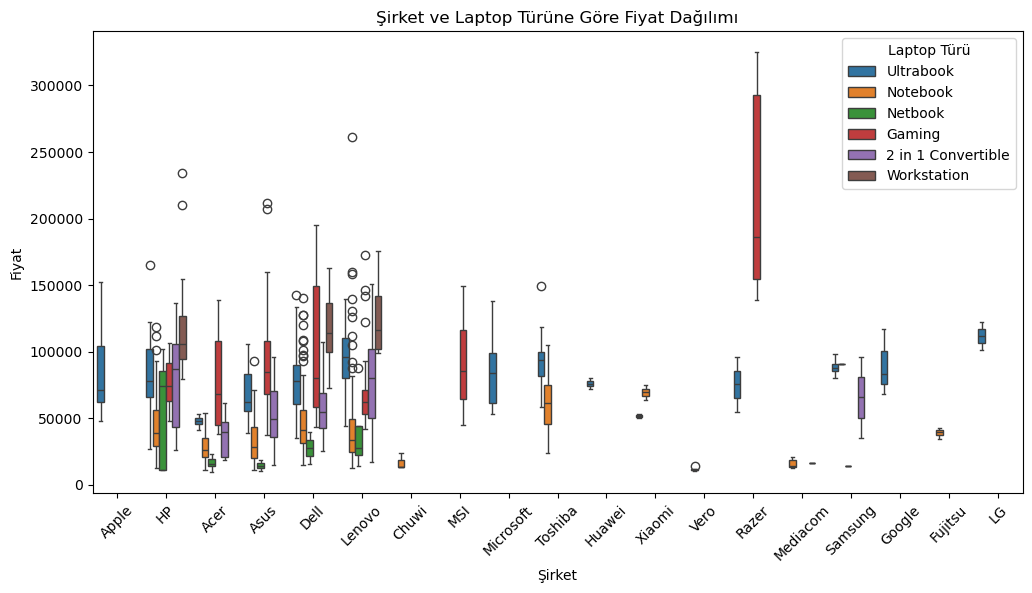


<----------Veri Setinde Şirket ve Laptop Türüne Göre Fiyat Dağılımı Tablolandırır.------->




In [1192]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Company", y="Price", hue="TypeName")
plt.title("Şirket ve Laptop Türüne Göre Fiyat Dağılımı")
plt.xlabel("Şirket")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.legend(title="Laptop Türü")
plt.show()

print("")
print("<----------Veri Setinde Şirket ve Laptop Türüne Göre Fiyat Dağılımı Tablolandırır.------->")
print("")
print("")

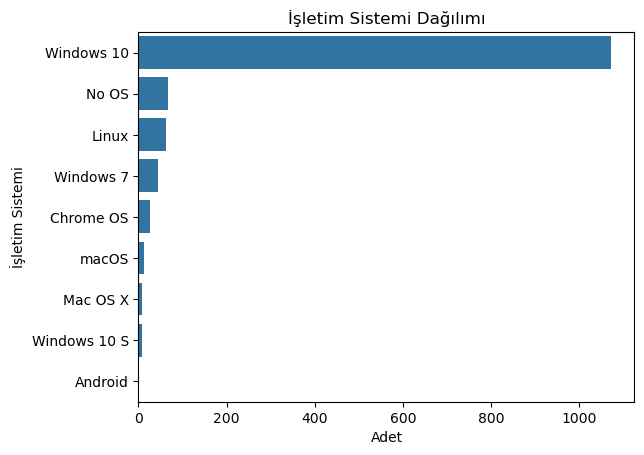


<----------Veri Setinde İşletim Sistemi Dağılımı Tablolandırır.------->




In [1193]:
sns.countplot(data=df, y="OpSys", order=df["OpSys"].value_counts().index)
plt.title("İşletim Sistemi Dağılımı")
plt.xlabel("Adet")
plt.ylabel("İşletim Sistemi")
plt.show()

print("")
print("<----------Veri Setinde İşletim Sistemi Dağılımı Tablolandırır.------->")
print("")
print("")

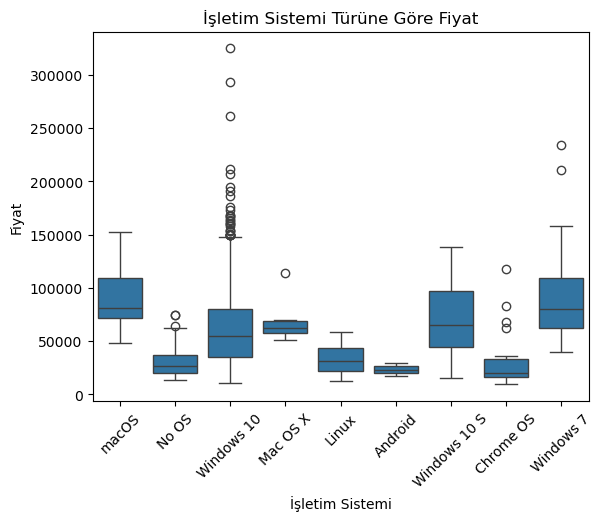


<----------Veri Setinde İşletim Sistemi Türüne Göre Fiyat.------->




In [1194]:
sns.boxplot(data=df, x="OpSys", y="Price")
plt.title("İşletim Sistemi Türüne Göre Fiyat")
plt.xlabel("İşletim Sistemi")
plt.ylabel("Fiyat")
plt.xticks(rotation=45)
plt.show()

print("")
print("<----------Veri Setinde İşletim Sistemi Türüne Göre Fiyat.------->")
print("")
print("")

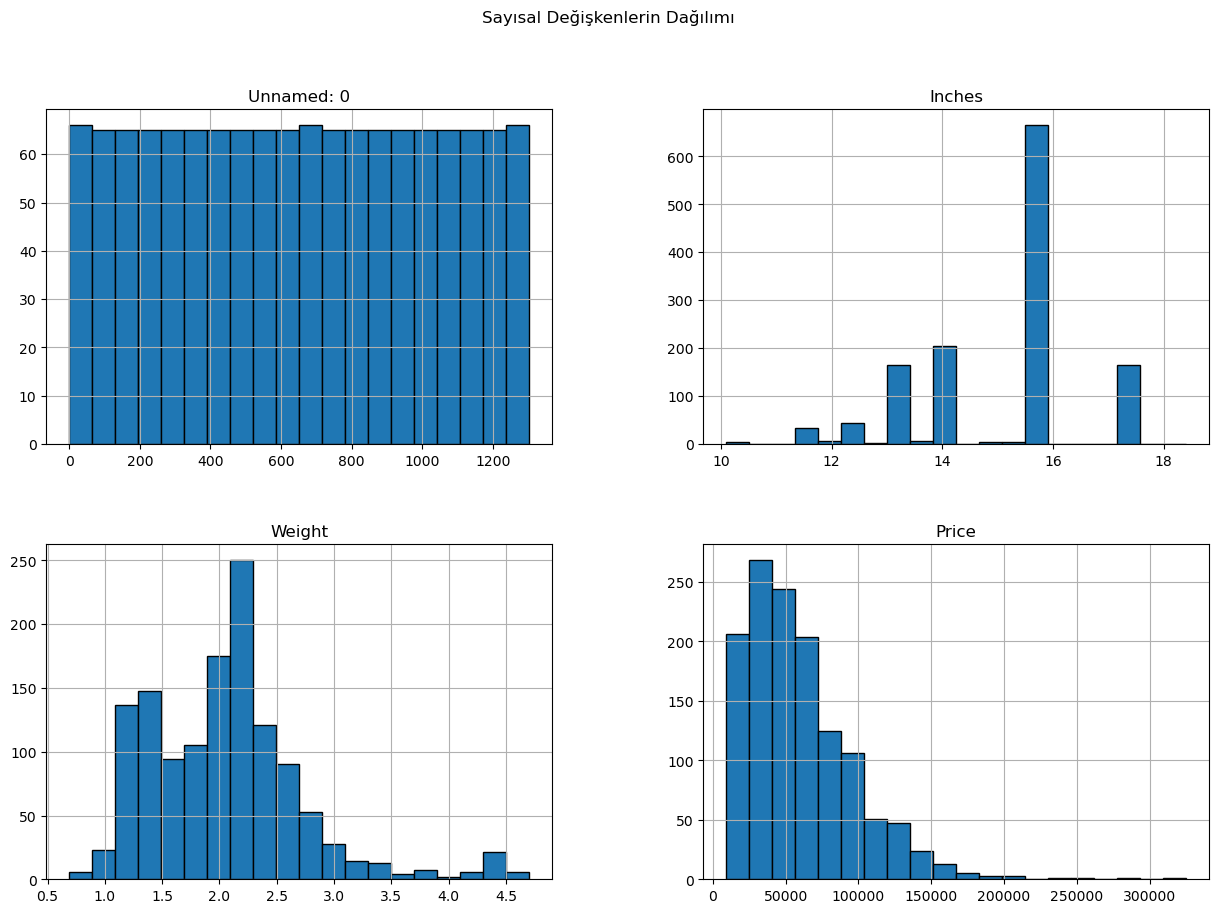


<----------Veri Setinde Sayısal Değişkenlerin Dağılımı Fiyat.------->




In [1195]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Sayısal Değişkenlerin Dağılımı")
plt.show()

print("")
print("<----------Veri Setinde Sayısal Değişkenlerin Dağılımı Fiyat.------->")
print("")
print("")

### Exploratory Data Analysis (EDA)

In [1197]:
print("<----------İlk 5 satır [head(n) ile ilk n satır].---------->")
df.head()

<----------İlk 5 satır [head(n) ile ilk n satır].---------->


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution_Type,Gpu_Brand
0,0,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.68,Retina,Intel
1,1,Apple,Ultrabook,13.30,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.52,Others,Intel
2,2,HP,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,Full HD,Intel
3,3,Apple,Ultrabook,15.40,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.34,Retina,AMD
4,4,Apple,Ultrabook,13.30,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.81,Retina,Intel


In [1198]:
print("")
print("<----------Son 5 satır [tail(n) ile son n satır].---------->")
print("")
df.tail()


<----------Son 5 satır [tail(n) ile son n satır].---------->



,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution_Type,Gpu_Brand
1298,1298,Lenovo,2 in 1 Convertible,14.00,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,Full HD,Intel
1299,1299,Lenovo,2 in 1 Convertible,13.30,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,Others,Intel
1300,1300,Lenovo,Notebook,14.00,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,Others,Intel
1301,1301,HP,Notebook,15.60,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,Others,AMD
1302,1302,Asus,Notebook,15.60,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,Others,Intel


In [1199]:
print("")
print("<----------Rastgele 1 satır [sample(n) ile rastgele n satır].---------->")
print("")
df.sample()


<----------Rastgele 1 satır [sample(n) ile rastgele n satır].---------->



,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution_Type,Gpu_Brand
1244,1244,HP,Notebook,14.00,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.54,58607.47,Full HD,Intel


In [1200]:
print("")
print("<----------# Satır ve sütun sayısı.---------->")
print("")
df.shape


<----------# Satır ve sütun sayısı.---------->



(1303, 14)

In [1201]:
print("")
print("<----------# Veri seti hakkında detaylı bilgi.---------->")
print("")
df.info()


<----------# Veri seti hakkında detaylı bilgi.---------->

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  Resolution_Type   1303 non-null   object 
 13  Gpu_Brand         1303 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 142.6+ KB


In [1202]:
print("")
print("<----------Tablodaki sayısal alanların istatistik verileri.---------->")
print("")
df.describe()


<----------Tablodaki sayısal alanların istatistik verileri.---------->



,Unnamed: 0,Inches,Weight,Price
count,1303.00,1303.00,1303.00,1303.00
mean,651.00,15.02,2.04,59870.04
std,376.29,1.43,0.67,37243.20
min,0.00,10.10,0.69,9270.72
25%,325.50,14.00,1.50,31914.72
50%,651.00,15.60,2.04,52054.56
75%,976.50,15.60,2.30,79274.25
max,1302.00,18.40,4.70,324954.72


In [1203]:
print("")
print("<----------Herbir sütundaki boş veri sayısı .---------->")
print("<----------boş kayıtlar yok! .---------->")
print("")
df.isnull().sum()


<----------Herbir sütundaki boş veri sayısı .---------->
<----------boş kayıtlar yok! .---------->



Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
Resolution_Type     0
Gpu_Brand           0
dtype: int64

In [1204]:
print("")
print("<----------Sadece boş kayıtları olan alanlar (boş sayısı 0'dan büyük olanlar)---------->")
print("")
miss=df.isnull().sum()
miss[miss>0] 


<----------Sadece boş kayıtları olan alanlar (boş sayısı 0'dan büyük olanlar)---------->



Series([], dtype: int64)

In [1205]:
df["Company"].isnull().sum()

0

In [1206]:
print("")
print("<----------TypeName alanında bulunan tekil değerler [nunique() bu tekil değerlerin sayısı]---------->")
print("")
df["TypeName"].unique()


<----------TypeName alanında bulunan tekil değerler [nunique() bu tekil değerlerin sayısı]---------->



array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [1207]:
print("")
print("<----------Memory alanında her bir değerden kaç adet var?---------->")
print("")
df["Memory"].value_counts()


<----------Memory alanında her bir değerden kaç adet var?---------->



Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [1208]:
print("")
print("<----------Memory alanındaki her bir tekil değerin oranı---------->")
print("")
df["Memory"].value_counts(normalize=True)


<----------Memory alanındaki her bir tekil değerin oranı---------->



Memory
256GB SSD                       0.32
1TB HDD                         0.17
500GB HDD                       0.10
512GB SSD                       0.09
128GB SSD +  1TB HDD            0.07
128GB SSD                       0.06
256GB SSD +  1TB HDD            0.06
32GB Flash Storage              0.03
2TB HDD                         0.01
64GB Flash Storage              0.01
512GB SSD +  1TB HDD            0.01
1TB SSD                         0.01
256GB SSD +  2TB HDD            0.01
1.0TB Hybrid                    0.01
256GB Flash Storage             0.01
16GB Flash Storage              0.01
32GB SSD                        0.00
180GB SSD                       0.00
128GB Flash Storage             0.00
512GB SSD +  2TB HDD            0.00
16GB SSD                        0.00
512GB Flash Storage             0.00
1TB SSD +  1TB HDD              0.00
256GB SSD +  500GB HDD          0.00
128GB SSD +  2TB HDD            0.00
256GB SSD +  256GB SSD          0.00
512GB SSD +  256GB SSD         

In [1209]:
print("")
print("<----------Inches alanı Weight ile yaklaşık %82.7 oranında ilişkili---------->")
print("<----------Veri setindeki sayısal alanların birbileri ile korelasyon durumları---------->")
print("")
df.corr(numeric_only=True)


<----------Inches alanı Weight ile yaklaşık %82.7 oranında ilişkili---------->
<----------Veri setindeki sayısal alanların birbileri ile korelasyon durumları---------->



,Unnamed: 0,Inches,Weight,Price
Unnamed: 0,1.00,-0.09,-0.01,0.07
Inches,-0.09,1.00,0.83,0.07
Weight,-0.01,0.83,1.00,0.21
Price,0.07,0.07,0.21,1.00


In [1210]:
print("")
print("<----------Weight alanının diğer alanlar ile korelasyon değerleri (sıralı)---------->")
print("")
abs(df.corr(numeric_only=True)['Weight']).sort_values(ascending=False)


<----------Weight alanının diğer alanlar ile korelasyon değerleri (sıralı)---------->



Weight       1.00
Inches       0.83
Price        0.21
Unnamed: 0   0.01
Name: Weight, dtype: float64

In [1211]:
print("")
print("<----------Inches alanının en büyük değeri---------->")
print("")
df["Inches"].max()


<----------Inches alanının en büyük değeri---------->



18.4

In [1212]:
print("")
print("<----------Inches alanının en küçük değeri---------->")
print("")
df["Inches"].min()


<----------Inches alanının en küçük değeri---------->



10.1

In [1213]:
print("")
print("<----------Inches alanının ortalama değeri---------->")
print("")
df["Inches"].mean()


<----------Inches alanının ortalama değeri---------->



15.017191097467379

In [1214]:
print("")
print("<----------Inches alanındaki verilerde ortanca değer---------->")
print("")
df["Inches"].median()


<----------Inches alanındaki verilerde ortanca değer---------->



15.6

In [1215]:
print("")
print("<----------Inches alanının standart sapma değeri---------->")
print("")
df["Inches"].std()


<----------Inches alanının standart sapma değeri---------->



1.4263040545691665

In [1216]:
print("")
print("<----------Inches alanının varyans değeri---------->")
print("")
df["Inches"].var()


<----------Inches alanının varyans değeri---------->



2.034343256080444

In [1217]:
print("")
print("<----------Tekrarlı veri var mı?---------->")
print("<----------Herşeyiyle birebir aynı kayıt yok.---------->")
print("<Bazı alanlara göre tekrarlı veri kontrolü yapmak için duplicated(subset=[Alan1, Alan2]) kullanılır>")
print("")
df[df.duplicated()==True]


<----------Tekrarlı veri var mı?---------->
<----------Herşeyiyle birebir aynı kayıt yok.---------->
<Bazı alanlara göre tekrarlı veri kontrolü yapmak için duplicated(subset=[Alan1, Alan2]) kullanılır>



,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution_Type,Gpu_Brand


### Veri Önişleme

In [1219]:
print("")
print("<----------Boş Veri Varmı Kontrol etme---------->")
print("")

print(df.isnull().sum())

print("")
print("<----------Boş Veri Yok---------->")


<----------Boş Veri Varmı Kontrol etme---------->

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
Resolution_Type     0
Gpu_Brand           0
dtype: int64

<----------Boş Veri Yok---------->


In [1220]:
print("")
print("<----------Min, max değerleri kontrol et---------->")
print(df.describe())


<----------Min, max değerleri kontrol et---------->
       Unnamed: 0  Inches  Weight     Price
count     1303.00 1303.00 1303.00   1303.00
mean       651.00   15.02    2.04  59870.04
std        376.29    1.43    0.67  37243.20
min          0.00   10.10    0.69   9270.72
25%        325.50   14.00    1.50  31914.72
50%        651.00   15.60    2.04  52054.56
75%        976.50   15.60    2.30  79274.25
max       1302.00   18.40    4.70 324954.72


In [1221]:
print("")
print("<----------Negatif ağırlıkları göster---------->")
print(df[df['Weight'] < 0]) 


<----------Negatif ağırlıkları göster---------->
Empty DataFrame
Columns: [Unnamed: 0, Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price, Resolution_Type, Gpu_Brand]
Index: []


In [1222]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

Company: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
TypeName: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
ScreenResolution: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full 

In [1223]:
print("")
print("<----------Her sütunun veri tipini kontrol et---------->")
print(df.dtypes) 


<----------Her sütunun veri tipini kontrol et---------->
Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Resolution_Type      object
Gpu_Brand            object
dtype: object


In [1224]:
print("")
print("<----------Farklı değerleri kontrol et---------->")
print(df['Price'].unique())


<----------Farklı değerleri kontrol et---------->
[ 71378.6832  47895.5232  30636.     135195.336   96095.808   21312.
 114017.6016  61735.536   79653.6     41025.6     20986.992   18381.0672
 130001.6016  26581.392   67260.672   80908.344   39693.6    152274.24
  26586.72    52161.12    10224.432   53226.72    13746.24    43636.32
  35111.52    22305.1392  58554.72    42624.      69157.44    47738.88
  13053.0672  10602.72    23389.92    99580.32    53173.44    13266.72
  19553.76    26037.4032  46833.12    20725.92    79866.72    27864.9072
  36336.96    75604.32    19660.32    69210.72    34045.92    24828.48
  16996.32    44808.48    21231.5472  58767.84    20459.52    40908.384
  31232.2032 130482.72    22111.2     31914.72    50136.48    36763.2
 105654.24    23373.4032  12201.12    29250.72    50562.72    58021.92
  50882.4     46353.6     58341.6     27652.32    45554.4     28238.4
  52054.56    58403.4048  80452.8     45820.8     21258.72    21045.6
  71874.72    37242.72    

In [1225]:
print("")
print("<----------Mantıksız RAM değerlerini kontrol et---------->")
print(df[df['Ram'] == "0GB"]) 


<----------Mantıksız RAM değerlerini kontrol et---------->
Empty DataFrame
Columns: [Unnamed: 0, Company, TypeName, Inches, ScreenResolution, Cpu, Ram, Memory, Gpu, OpSys, Weight, Price, Resolution_Type, Gpu_Brand]
Index: []


In [1226]:
print("")
print("<----------Hatalı değerlerin toplamı---------->")
print(df.isin(["?", "Unknown", 0]).sum()) 


<----------Hatalı değerlerin toplamı---------->
Unnamed: 0          1
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
Resolution_Type     0
Gpu_Brand           0
dtype: int64


In [1227]:
print("")
print("<----------Hatalı değeri silip tabloyu güncelleme---------->")
df = df.drop(columns=["Unnamed: 0"])
df.info()


<----------Hatalı değeri silip tabloyu güncelleme---------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Resolution_Type   1303 non-null   object 
 12  Gpu_Brand         1303 non-null   object 
dtypes: float64(3), object(10)
memory usage: 132.5+ KB


### Feature Engineering

Özellik Mühendisliği bir makine öğrenimi modelinin performansını artırmak için verilerden anlamlı özelliklerin (features) çıkarılması sürecidir. Bu, modelin daha iyi öğrenmesini ve genel performansını artırmasını sağlar. İşte feature engineering'in bazı temel bileşenleri ve teknikleri:

* Özellik Çıkartma (Feature Extraction)
* Özellik Dönüştürme (Feature Transformation)
* Dönüşüm Özellikleri (Polynomial Features)
* Kombinasyon Özellikleri (Combination Features)
* Özellik Seçimi (Feature Selection)

#### Özellik Dönüştürme (Feature Transformation)

Verilerin farklı formatlarda veya ölçeklerde temsil edilmesini sağlar. Örneğin, sürekli değişkenleri normalize etmek veya kategorik verileri bir sıcak kodlama (one-hot encoding) yöntemiyle dönüştürmek.

#### Özellik Çıkartma (Feature Extraction)
Verilerden yeni özellikler oluşturmak için mevcut verileri kullanma sürecidir. Örneğin, tarih verilerinden yıl, ay ve gün gibi ayrı özellikler çıkarabilirsiniz.

In [1231]:
df["Ram"] = df["Ram"].astype(str)

In [1232]:
df["New_Ram_Numeric"] = df["Ram"].str.replace("GB", "").astype(int)
print(df[["Ram", "New_Ram_Numeric"]].head())

    Ram  New_Ram_Numeric
0   8GB                8
1   8GB                8
2   8GB                8
3  16GB               16
4   8GB                8


In [1233]:
Company_Group = {
    "Dell" : 1,
    "Lenovo" : 2,
    "HP" : 3,
    "Asus" : 4,
    "Acer" : 5,
    "MSI" : 6,
    "Toshiba" : 7,
    "Apple" : 8,
    "Samsung" : 9,
    "Razer" : 10,
    "Mediacom" : 11,
    "Microsoft" : 12,
    "Xiaomi" : 13,
    "Vero" : 14,
    "Chuwi" : 15,
    "Google" : 16,
    "Fujitsu" : 17,
    "LG" : 18,
    "Huawei" : 29
}
df["Company_Numeric"] = df["Company"].map(Company_Group)


In [1234]:
TypeName_Group = {
    "Ultrabook": 1,
    "Notebook" : 2,
    "Netbook" : 3,
    "Gaming" : 4,
    "2 in 1 Convertible" : 5,
    "Workstation" : 6
}

df["TypeName_Numeric"] = df["TypeName"].map(TypeName_Group)

In [1235]:
df["Weight"] = df["Weight"].astype(str).str.replace("kg", "").astype(float)

In [1236]:
df[["Panel_Type", "Display_Type", "Resolution"]] = df["ScreenResolution"].str.extract(
    r"(IPS Panel)? ?(\w+ Display)? (\d+x\d+)?"
)

# Eksik değerleri dolduralım
df["Panel_Type"].fillna("Standard Panel", inplace=True)
df["Display_Type"].fillna("Standard Display", inplace=True)
df["Resolution"].fillna("0x0", inplace=True)

In [1237]:
df[["Res_Width", "Res_Height"]] = df["Resolution"].str.split("x", expand=True).astype(float)

In [1238]:
# Eksik değerleri varsayılanlarla dolduralım
df[["Cpu_Brand", "Cpu_Model", "Cpu_Speed"]] = df["Cpu"].str.extract(r"(\w+) (\w+.*) (\d+\.\d+GHz)")
df["Cpu_Speed"] = df["Cpu_Speed"].str.replace("GHz", "").astype(float)

# Varsayılan değerler atayalım
df["Cpu_Brand"].fillna("Unknown", inplace=True)
df["Cpu_Model"].fillna("Unknown", inplace=True)
df["Cpu_Speed"].fillna(0.0, inplace=True)

In [1239]:
Memory_Group = {
"256GB SSD":1,
"1TB HDD":2,
"500GB HDD":3,
"512GB SSD":4,
"128GB SSD +  1TB HDD":5,
"128GB SSD":6,
"256GB SSD +  1TB HDD":7,
"32GB Flash Storage":8,
"2TB HDD":9,
"64GB Flash Storage":10,
"512GB SSD +  1TB HDD":11,
"1TB SSD":12,
"256GB SSD +  2TB HDD":13,
"1.0TB Hybrid":14,
"256GB Flash Storage":15,
"16GB Flash Storage":16,
"32GB SSD":17,
"180GB SSD":18,
"128GB Flash Storage":19,
"512GB SSD +  2TB HDD":20,
"16GB SSD":21,
"512GB Flash Storage":22,
"1TB SSD +  1TB HDD":23,
"256GB SSD +  500GB HDD":24,
"128GB SSD +  2TB HDD":25,
"256GB SSD +  256GB SSD":26,
"512GB SSD +  256GB SSD":27,
"512GB SSD +  512GB SSD":28,
"64GB Flash Storage +  1TB HDD":29,
"1TB HDD +  1TB HDD":30,
"32GB HDD":31,
"64GB SSD":32,
"128GB HDD":33,
"240GB SSD":34,
"8GB SSD":35,
"508GB Hybrid":36,
"1.0TB HDD":37,
"512GB SSD +  1.0TB Hybrid":38,
"256GB SSD +  1.0TB Hybrid":39
}

df["Memory"] = df["Memory"].map(Memory_Group)

In [1240]:
df[["Gpu_Brand", "Gpu_Model"]] = df["Gpu"].str.extract(r"(\w+) (.+)")

In [1241]:
opsys_group = {
    "macOS": 1,
    "No OS": 2,
    "Windows 10": 3,
    "Linux": 4,
    "Chrome OS": 5,
    "Android": 6,
    "Windows 7" : 7,
    "Mac OS X" : 8,
    "Windows 10 S" : 9
}
df["OpSys_Numeric"] = df["OpSys"].map(opsys_group)

In [1242]:
converted_columns = pd.DataFrame({
    "Numeric_Ram": df["New_Ram_Numeric"],
    "Company_Numeric": df["Company_Numeric"],
    "TypeName_Numeric": df["TypeName_Numeric"],
    "Inches": df["Inches"],
    "Weight": df["Weight"],
    "Memory" : df["Memory"] ,
    "OpSys_Numeric" : df["OpSys_Numeric"]
})

# Panel_Type, Display_Type ve Resolution sütunlarını ekleyelim
converted_columns[["Panel_Type", "Display_Type"]] = df[["Panel_Type", "Display_Type"]]
converted_columns[["Res_Width","Res_Height"]] = df[["Res_Width", "Res_Height"]]
converted_columns[["Gpu_Brand","Gpu_Model"]] = df[["Gpu_Brand", "Gpu_Model"]]
converted_columns[["Cpu_Brand","Cpu_Model","Cpu_Speed"]] = df[["Cpu_Brand","Cpu_Model","Cpu_Speed"]]

In [1243]:
DisplayType_Group = {
    "Standard Display" : 1,
    "Retina Display" : 2
}

converted_columns["Display_Type"] = converted_columns["Display_Type"].map(DisplayType_Group)

In [1244]:
Panel_Type_Group = {
    "Standard Panel" : 1,
    "IPS Panel" : 2
}

converted_columns["Panel_Type"] = converted_columns["Panel_Type"].map(Panel_Type_Group)

In [1245]:
Gpu_Brand_Group = {
    "Intel" : 1,
    "Nvidia" : 2,
    "AMD" : 3,
    "ARM" : 4
}

converted_columns["Gpu_Brand"] = converted_columns["Gpu_Brand"].map(Gpu_Brand_Group)

In [1246]:
# Gpu_Model'i parçalarına ayıralım
converted_columns[["Gpu_Brand", "Gpu_Series", "Gpu_Number"]] = converted_columns["Gpu_Model"].str.extract(r"(\w+) (\w+)? ?(\d+)?")

# Eksik değerleri "Unknown" ile dolduralım
converted_columns["Gpu_Series"].fillna("Unknown", inplace=True)
converted_columns["Gpu_Number"].fillna("0", inplace=True)  # Sayısal eksik değerleri '0' yapıyoruz

# Gpu_Series'i numaralandıralım
gpu_series_mapping = {series: idx for idx, series in enumerate(converted_columns["Gpu_Series"].unique(), start=1)}
converted_columns["Gpu_Series_Numeric"] = converted_columns["Gpu_Series"].map(gpu_series_mapping)

# Gpu_Number'ı sayısal değere dönüştürelim
converted_columns["Gpu_Number"] = converted_columns["Gpu_Number"].astype(int)

# Sonuçları kontrol edelim
converted_columns[["Gpu_Brand", "Gpu_Series", "Gpu_Series_Numeric", "Gpu_Number"]].head()

,Gpu_Brand,Gpu_Series,Gpu_Series_Numeric,Gpu_Number
0,Iris,Plus,1,0
1,HD,Graphics,2,6000
2,HD,Graphics,2,620
3,Radeon,Pro,3,455
4,Iris,Plus,1,0


In [1247]:
Cpu_Brand_Group = {
    "Intel": 1,
    "Unknown": 2,
    "AMD": 3,
    "Samsung": 4
}

converted_columns["Cpu_Brand"] = converted_columns["Cpu_Brand"].map(Cpu_Brand_Group)

In [1248]:
# Cpu_Model'i parçalayalım: "Seri" ve "Model" olarak ayırıyoruz
converted_columns[["Cpu_Series", "Cpu_Model_Number"]] = converted_columns["Cpu_Model"].str.extract(r"(Core \w+|Ryzen \d+|Pentium|Celeron|Atom|Xeon|E-Series) ?(.+)?")

# Eksik değerleri dolduralım
converted_columns["Cpu_Series"].fillna("Unknown", inplace=True)
converted_columns["Cpu_Model_Number"].fillna("0", inplace=True)  # Sayısal eksikler için "0"

# Cpu_Series'i numaralandıralım
cpu_series_mapping = {series: idx for idx, series in enumerate(converted_columns["Cpu_Series"].unique(), start=1)}
converted_columns["Cpu_Series_Numeric"] = converted_columns["Cpu_Series"].map(cpu_series_mapping)

# Cpu_Model_Number'daki sayıları ayırarak işleyelim
converted_columns["Cpu_Model_Number"] = converted_columns["Cpu_Model_Number"].str.extract(r"(\d+)").fillna(0).astype(int)

# İşlemin sonuçlarını kontrol edelim
converted_columns[["Cpu_Series", "Cpu_Series_Numeric", "Cpu_Model_Number"]].head()


,Cpu_Series,Cpu_Series_Numeric,Cpu_Model_Number
0,Core i5,1,0
1,Core i5,1,0
2,Core i5,1,7200
3,Core i7,2,0
4,Core i5,1,0


In [1249]:
Gpu_Series_Group = {
"Graphics" : 1,
"GTX" : 2,
"R5" : 3,
"940MX" : 4,
"530" : 5,
"R7"  : 6,
"930MX" : 7,
"920MX" : 8,
"520" : 9,
"MX150" : 10,
"RX" : 11,
"Plus" : 12,
"M1200" : 13,
"R2" : 14,
"R4" : 15,
"MX130" : 16,
"920M" : 17,
"930M" : 18,
"M620" : 19,
"GT" : 20,
"M1000M" : 21,
"Pro" : 22,
"150MX" : 23,
"M2200M" : 24,
"W4190M" : 25,
"M2000M" : 26,
"M2200"  : 27,
"M520M"  : 28,
"R9" : 29,
"R3" :30,
"W6150M" : 31,
"3000M" : 32,
"920" : 33,
"M500M" : 34,
"M3000M" : 35,
"960M" : 36,
"940M" : 37,
"Unknown" : 38,
"GTX1060" : 39,
"540" : 40,
"620" : 41,
"M620M" : 42,
"GTX1050" : 43,
"GTX1080" : 44,
"W5130M"  : 45,
"980" : 46,
"T860" : 47 
}

converted_columns["Gpu_Series"] = converted_columns["Gpu_Series"].map(Gpu_Series_Group)

In [1250]:
Cpu_Series_Group = {
    "Core i7" : 1,
    "Core i5" : 2,
    "Unknown" : 3,
    "Celeron" : 4,
    "Core i3" : 5,
    "Pentium" : 6,
    "Core M" : 7,
    "Atom" : 8,
    "E-Series" : 9,
    "Xeon" : 10,
    "Ryzen 1600" : 11
}

converted_columns["Cpu_Series"] = converted_columns["Cpu_Series"].map(Cpu_Series_Group)

In [1251]:
converted_columns = converted_columns.drop('Gpu_Brand', axis=1)
converted_columns = converted_columns.drop('Gpu_Model', axis=1)
converted_columns = converted_columns.drop('Cpu_Model', axis=1)

In [1252]:
converted_columns.shape

(1303, 19)

### Model Deneme ve Test Etme

In [1254]:
le = LabelEncoder()

In [1255]:
cat = []
num = []
for i in converted_columns.columns:
    if converted_columns[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [1271]:
for i in cat:
    converted_columns[i] = le.fit_transform(df[i])
converted_columns.head()

,Numeric_Ram,Company_Numeric,TypeName_Numeric,Inches,Weight,Memory,OpSys_Numeric,Panel_Type,Display_Type,Res_Width,Res_Height,Cpu_Brand,Cpu_Speed,Gpu_Series,Gpu_Number,Gpu_Series_Numeric,Cpu_Series,Cpu_Model_Number,Cpu_Series_Numeric
0,8,8,1,13.30,1.37,6,1,2,2,2560.00,1600.00,1,2.30,12,0,1,2,0,1
1,8,8,1,13.30,1.34,19,1,1,1,0.00,0.00,1,1.80,1,6000,2,2,0,1
2,8,3,2,15.60,1.86,1,2,1,1,0.00,0.00,1,2.50,1,620,2,2,7200,1
3,16,8,1,15.40,1.83,4,1,2,2,2880.00,1800.00,1,2.70,22,455,3,1,0,2
4,8,8,1,13.30,1.37,1,1,2,2,2560.00,1600.00,1,3.10,12,0,1,2,0,1


In [1273]:
x=converted_columns
y = df.Price

In [1275]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [1277]:
x.shape, y.shape

((1303, 19), (1303,))

In [1279]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)

In [1281]:
converted_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Numeric_Ram         1303 non-null   int32  
 1   Company_Numeric     1303 non-null   int64  
 2   TypeName_Numeric    1303 non-null   int64  
 3   Inches              1303 non-null   float64
 4   Weight              1303 non-null   float64
 5   Memory              1303 non-null   int64  
 6   OpSys_Numeric       1303 non-null   int64  
 7   Panel_Type          1303 non-null   int64  
 8   Display_Type        1303 non-null   int64  
 9   Res_Width           1303 non-null   float64
 10  Res_Height          1303 non-null   float64
 11  Cpu_Brand           1303 non-null   int64  
 12  Cpu_Speed           1303 non-null   float64
 13  Gpu_Series          1303 non-null   int64  
 14  Gpu_Number          1303 non-null   int32  
 15  Gpu_Series_Numeric  1303 non-null   int64  
 16  Cpu_Se

In [1285]:
models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)


100%|██████████| 42/42 [00:02<00:00, 18.73it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 912, number of used features: 18
[LightGBM] [Info] Start training from score 59121.743532


In [1287]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.84,0.85,15282.89,0.11
XGBRegressor,0.83,0.84,15540.53,0.07
ExtraTreesRegressor,0.83,0.83,15870.35,0.27
RandomForestRegressor,0.82,0.83,15936.12,0.35
BaggingRegressor,0.80,0.81,16792.70,0.04
HistGradientBoostingRegressor,0.79,0.80,17327.45,0.17
LGBMRegressor,0.79,0.80,17571.07,0.05
DecisionTreeRegressor,0.77,0.78,18239.66,0.01
ExtraTreeRegressor,0.69,0.70,21199.28,0.01
